# Supply Chain Management Pricing Dataset

# Context
This data set provides supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries. In addition, the data set provides the commodity pricing and associated supply chain expenses necessary to move the commodities to countries for use.

# Content
The dataset has similar fields to the Global Fund's Price, Quality and Reporting (PQR) data. PEPFAR and the Global Fund represent the two largest procurers of HIV health commodities. This dataset, when analyzed in conjunction with the PQR data, provides a more complete picture of global spending on specific health commodities. The data are particularly valuable for understanding ranges and trends in pricing as well as volumes delivered by country. The US Government believes this data will help stakeholders make better, data-driven decisions. Care should be taken to consider contextual factors when using the database. Conclusions related to costs associated with moving specific line items or products to specific countries and lead times by product/country will not be accurate.

Some Important facts about About Dataset:
* Line item Insurance: for one line item (It can have any quantity), what is the annual insurance cost
* Line item value =  pack price * line item quantity
* Weight : for all line items in Delivery note
* Freight cost: shipment cost (Our Target parameter)
* Pack price = unit price * unites per pack


In [1]:
# Importing Libraries
import pandas as pd
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [3]:
DF =  pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv')

In [32]:
# for deleting columns in dataframe
# x is list of columns

def drop_col(df,x): 
    for i in x:
        df.drop(i,axis =1, inplace = True) 

In [5]:
# To count how many unique items are there are in a column
def unique_count(df,x):
    for i in x:
        print(pd.value_counts(df[i]).count(), 'are unique values in', i)
        


In [6]:
# For encoding categorical columns
def Encode(df,x):
    for i in x:
        df[i] = encoder.fit_transform(df[i])

In [7]:
# To convert to date_time
def Datetime (df,x):
    for i in x:
        df[i] = pd.to_datetime(df[i],dayfirst=True)



In [8]:
# for further testing purpose
# will remove the rows whrer date is not mentioned
df = pd.DataFrame(DF)

In [9]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)'], dtype='object')

In [10]:
df.columns = ['ID','Project_Code', 'Purchase_Quote','Purchase_Order','Delivery_Note', 'Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date', 'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule_Test_Type', 'Brand', 'Dosage', 'Dosage_Form', 'Units_per_pack', 'Line_Item_Quantity', 'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site', 'First_Line_Designation', 'Weight_Kg', 'Freight_Cost_USD', 'Line_Item_Insurance_USD']

In [11]:
df =df[df['PO_Sent_to_Vendor_Date'] != 'Date Not Captured']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 9 to 10323
Data columns (total 33 columns):
ID                              9996 non-null int64
Project_Code                    9996 non-null object
Purchase_Quote                  9996 non-null object
Purchase_Order                  9996 non-null object
Delivery_Note                   9996 non-null object
Country                         9996 non-null object
Managed_By                      9996 non-null object
Fulfill_Via                     9996 non-null object
Vendor_INCO_Term                9996 non-null object
Shipment_Mode                   9639 non-null object
PQ_First_Sent_to_Client_Date    9996 non-null object
PO_Sent_to_Vendor_Date          9996 non-null object
Scheduled_Delivery_Date         9996 non-null object
Delivered_to_Client_Date        9996 non-null object
Delivery_Recorded_Date          9996 non-null object
Product_Group                   9996 non-null object
Sub_Classification              9996 non-null

In [13]:
df.describe()

ID  Units_per_pack  Line_Item_Quantity  Line_Item_Value   Pack_Price   Unit_Price  Line_Item_Insurance_USD
count   9996.000000     9996.000000         9996.000000     9.996000e+03  9996.000000  9996.000000              9787.000000
mean   52343.975390       77.324430        18842.244198     1.616428e+05    21.585686     0.616428               245.234499
std    31512.456038       75.915642        40567.047220     3.498300e+05    45.082898     3.326899               505.298454
min       47.000000        1.000000            1.000000     0.000000e+00     0.000000     0.000000                 0.000000
25%    14360.000000       30.000000          450.000000     4.739275e+03     4.120000     0.080000                 7.085000
50%    60292.500000       60.000000         3187.000000     3.216334e+04     8.985000     0.160000                49.900000
75%    83751.250000       90.000000        17959.000000     1.713656e+05    23.285000     0.460000               260.065000
max    86823.000000     1000.000000       619999.000000     5.951990e+06  1345.640000   238.650000              7708.440000

# Drop columns and Reason

1. ID Alwasy unique number 
2. PO/SO # are order number and don't add any value
3. ASN/DN delivery notes and Advanced shipment notes, don't add any value to 
4. Project code, 142 are just numbers once done not repeated


In [14]:
drop_x = ['ID','Project_Code', 'Purchase_Quote','Purchase_Order','Delivery_Note']
drop_col(df,drop_x)

In [15]:
df = df[df['PQ_First_Sent_to_Client_Date'] != 'Pre-PQ Process']

In [16]:
df=df[df['PQ_First_Sent_to_Client_Date'] != 'Date Not Captured']

In [17]:
df.isnull().sum()

Country                            0
Managed_By                         0
Fulfill_Via                        0
Vendor_INCO_Term                   0
Shipment_Mode                      0
PQ_First_Sent_to_Client_Date       0
PO_Sent_to_Vendor_Date             0
Scheduled_Delivery_Date            0
Delivered_to_Client_Date           0
Delivery_Recorded_Date             0
Product_Group                      0
Sub_Classification                 0
Vendor                             0
Item_Description                   0
Molecule_Test_Type                 0
Brand                              0
Dosage                          1178
Dosage_Form                        0
Units_per_pack                     0
Line_Item_Quantity                 0
Line_Item_Value                    0
Pack_Price                         0
Unit_Price                         0
Manufacturing_Site                 0
First_Line_Designation             0
Weight_Kg                          0
Freight_Cost_USD                   0
L

In [18]:
datetime_x = ['PQ_First_Sent_to_Client_Date', 'Scheduled_Delivery_Date', 'Delivered_to_Client_Date', 'Delivery_Recorded_Date']
Datetime(df,datetime_x)


In [19]:
df.head()

Country Managed_By  Fulfill_Via Vendor_INCO_Term Shipment_Mode PQ_First_Sent_to_Client_Date PO_Sent_to_Vendor_Date Scheduled_Delivery_Date Delivered_to_Client_Date Delivery_Recorded_Date Product_Group Sub_Classification                                             Vendor                                   Item_Description                   Molecule_Test_Type      Brand     Dosage                        Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price              Manufacturing_Site First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD
2681        Kenya   PMO - US  Direct Drop              EXW           Air                   2009-11-18             12-02-2009              2010-02-16               2010-02-19             2010-02-19          HRDT           HIV test                                      Orgenics, Ltd     HIV 1/2, Determine Complete HIV Kit, 100 Tests  HIV 1/2, Determine Complete HIV Kit  Determine        NaN                           Test kit             100                   1             80.0       80.00        0.80                 Inverness Japan                    Yes      1028         10083.69                     0.17
2682      Vietnam   PMO - US  Direct Drop              EXW           Air                   2013-03-05              5/15/2013              2014-01-09               2014-01-09             2014-01-09           ARV              Adult  MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                Lamivudine/Zidovudine    Generic  150/300mg                       Tablet - FDC              60               11092          74871.0        6.75        0.11  Mylan (formerly Matrix) Nashik                    Yes       957          1869.41                    92.62
2683       Zambia   PMO - US  Direct Drop              EXW           Air                   2014-08-19              9/19/2014              2015-05-12               2015-05-12             2015-05-14          HRDT           HIV test                                      Orgenics, Ltd     HIV 1/2, Determine Complete HIV Kit, 100 Tests  HIV 1/2, Determine Complete HIV Kit  Determine        NaN                           Test kit             100                6280         502400.0       80.00        0.80         Alere Medical Co., Ltd.                    Yes      2548         28709.52                   516.47
2684        Haiti   PMO - US  Direct Drop              EXW           Air                   2012-06-01              2/24/2012              2012-06-12               2012-06-12             2012-06-12           ARV          Pediatric                                      CIPLA LIMITED  Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...      Lamivudine/Nevirapine/Stavudine    Generic  30/50/6mg  Chewable/dispersible tablet - FDC              60                 298            685.4        2.30        0.04               Cipla, Goa, India                    Yes        21           304.62                     0.96
2685  South Sudan   PMO - US  Direct Drop              EXW           Air                   2013-02-22             04-01-2013              2013-08-16               2013-08-16             2013-08-16          HRDT           HIV test                                      Orgenics, Ltd     HIV 1/2, Determine Complete HIV Kit, 100 Tests  HIV 1/2, Determine Complete HIV Kit  Determine        NaN                           Test kit             100                  90           8010.0       89.00        0.89         Alere Medical Co., Ltd.                    Yes        39          1434.98                     9.91

In [20]:
df['Dosage'].bfill(axis = 0, inplace = True)

In [21]:
df['Dosage'].isnull().sum()

0

In [22]:
df.head()

Country Managed_By  Fulfill_Via Vendor_INCO_Term Shipment_Mode PQ_First_Sent_to_Client_Date PO_Sent_to_Vendor_Date Scheduled_Delivery_Date Delivered_to_Client_Date Delivery_Recorded_Date Product_Group Sub_Classification                                             Vendor                                   Item_Description                   Molecule_Test_Type      Brand     Dosage                        Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price              Manufacturing_Site First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD
2681        Kenya   PMO - US  Direct Drop              EXW           Air                   2009-11-18             12-02-2009              2010-02-16               2010-02-19             2010-02-19          HRDT           HIV test                                      Orgenics, Ltd     HIV 1/2, Determine Complete HIV Kit, 100 Tests  HIV 1/2, Determine Complete HIV Kit  Determine  150/300mg                           Test kit             100                   1             80.0       80.00        0.80                 Inverness Japan                    Yes      1028         10083.69                     0.17
2682      Vietnam   PMO - US  Direct Drop              EXW           Air                   2013-03-05              5/15/2013              2014-01-09               2014-01-09             2014-01-09           ARV              Adult  MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                Lamivudine/Zidovudine    Generic  150/300mg                       Tablet - FDC              60               11092          74871.0        6.75        0.11  Mylan (formerly Matrix) Nashik                    Yes       957          1869.41                    92.62
2683       Zambia   PMO - US  Direct Drop              EXW           Air                   2014-08-19              9/19/2014              2015-05-12               2015-05-12             2015-05-14          HRDT           HIV test                                      Orgenics, Ltd     HIV 1/2, Determine Complete HIV Kit, 100 Tests  HIV 1/2, Determine Complete HIV Kit  Determine  30/50/6mg                           Test kit             100                6280         502400.0       80.00        0.80         Alere Medical Co., Ltd.                    Yes      2548         28709.52                   516.47
2684        Haiti   PMO - US  Direct Drop              EXW           Air                   2012-06-01              2/24/2012              2012-06-12               2012-06-12             2012-06-12           ARV          Pediatric                                      CIPLA LIMITED  Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...      Lamivudine/Nevirapine/Stavudine    Generic  30/50/6mg  Chewable/dispersible tablet - FDC              60                 298            685.4        2.30        0.04               Cipla, Goa, India                    Yes        21           304.62                     0.96
2685  South Sudan   PMO - US  Direct Drop              EXW           Air                   2013-02-22             04-01-2013              2013-08-16               2013-08-16             2013-08-16          HRDT           HIV test                                      Orgenics, Ltd     HIV 1/2, Determine Complete HIV Kit, 100 Tests  HIV 1/2, Determine Complete HIV Kit  Determine      100mg                           Test kit             100                  90           8010.0       89.00        0.89         Alere Medical Co., Ltd.                    Yes        39          1434.98                     9.91

# Columns to Encode
1. Manufacturing Site
2. First Line Designation
3. Country
4. Managed by
5. Fulfill Via
6. Vendor incoterm
7. Shipment
8. Product group
9. Sub Classification
10. Vendor
11. Item Description
12. Molecule test
13. Brand
14. Dosage Form
16. 

In [23]:
encd_x =['Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode', 'Product_Group', 'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule_Test_Type', 'Brand', 'Dosage_Form','Manufacturing_Site','First_Line_Designation' ]

In [24]:
Encode(df,encd_x)

In [25]:
df.head()

Country  Managed_By  Fulfill_Via  Vendor_INCO_Term  Shipment_Mode PQ_First_Sent_to_Client_Date PO_Sent_to_Vendor_Date Scheduled_Delivery_Date Delivered_to_Client_Date Delivery_Recorded_Date  Product_Group  Sub_Classification  Vendor  Item_Description  Molecule_Test_Type  Brand     Dosage  Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price  Manufacturing_Site  First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD
2681       17           2            0                 5              0                   2009-11-18             12-02-2009              2010-02-16               2010-02-19             2010-02-19              3                   2      39                61                  24      8  150/300mg           15             100                   1             80.0       80.00        0.80                  35                       1      1028         10083.69                     0.17
2682       37           2            0                 5              0                   2013-03-05              5/15/2013              2014-01-09               2014-01-09             2014-01-09              2                   1      36               103                  55     12  150/300mg           11              60               11092          74871.0        6.75        0.11                  49                       1       957          1869.41                    92.62
2683       38           2            0                 5              0                   2014-08-19              9/19/2014              2015-05-12               2015-05-12             2015-05-14              3                   2      39                61                  24      8  30/50/6mg           15             100                6280         502400.0       80.00        0.80                   6                       1      2548         28709.52                   516.47
2684       16           2            0                 5              0                   2012-06-01              2/24/2012              2012-06-12               2012-06-12             2012-06-12              2                   5      16                94                  51     12  30/50/6mg            2              60                 298            685.4        2.30        0.04                  18                       1        21           304.62                     0.96
2685       31           2            0                 5              0                   2013-02-22             04-01-2013              2013-08-16               2013-08-16             2013-08-16              3                   2      39                61                  24      8      100mg           15             100                  90           8010.0       89.00        0.89                   6                       1        39          1434.98                     9.91

In [26]:
df['PQ_Del_duration'] = df['Delivery_Recorded_Date']-df['PQ_First_Sent_to_Client_Date']
df['Deviaiton_in_Del_days'] =df['Delivery_Recorded_Date']-df['Scheduled_Delivery_Date']


In [27]:
df.head()

Country  Managed_By  Fulfill_Via  Vendor_INCO_Term  Shipment_Mode PQ_First_Sent_to_Client_Date PO_Sent_to_Vendor_Date Scheduled_Delivery_Date Delivered_to_Client_Date Delivery_Recorded_Date  Product_Group  Sub_Classification  Vendor  Item_Description  Molecule_Test_Type  Brand     Dosage  Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price  Manufacturing_Site  First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD PQ_Del_duration Deviaiton_in_Del_days
2681       17           2            0                 5              0                   2009-11-18             12-02-2009              2010-02-16               2010-02-19             2010-02-19              3                   2      39                61                  24      8  150/300mg           15             100                   1             80.0       80.00        0.80                  35                       1      1028         10083.69                     0.17         93 days                3 days
2682       37           2            0                 5              0                   2013-03-05              5/15/2013              2014-01-09               2014-01-09             2014-01-09              2                   1      36               103                  55     12  150/300mg           11              60               11092          74871.0        6.75        0.11                  49                       1       957          1869.41                    92.62        310 days                0 days
2683       38           2            0                 5              0                   2014-08-19              9/19/2014              2015-05-12               2015-05-12             2015-05-14              3                   2      39                61                  24      8  30/50/6mg           15             100                6280         502400.0       80.00        0.80                   6                       1      2548         28709.52                   516.47        268 days                2 days
2684       16           2            0                 5              0                   2012-06-01              2/24/2012              2012-06-12               2012-06-12             2012-06-12              2                   5      16                94                  51     12  30/50/6mg            2              60                 298            685.4        2.30        0.04                  18                       1        21           304.62                     0.96         11 days                0 days
2685       31           2            0                 5              0                   2013-02-22             04-01-2013              2013-08-16               2013-08-16             2013-08-16              3                   2      39                61                  24      8      100mg           15             100                  90           8010.0       89.00        0.89                   6                       1        39          1434.98                     9.91        175 days                0 days

In [28]:
df['PQ_Del_duration']=df['PQ_Del_duration'].apply(lambda x:x.days)
df['Deviaiton_in_Del_days']=df['Deviaiton_in_Del_days'].apply(lambda x:x.days)


In [29]:
df.head()

Country  Managed_By  Fulfill_Via  Vendor_INCO_Term  Shipment_Mode PQ_First_Sent_to_Client_Date PO_Sent_to_Vendor_Date Scheduled_Delivery_Date Delivered_to_Client_Date Delivery_Recorded_Date  Product_Group  Sub_Classification  Vendor  Item_Description  Molecule_Test_Type  Brand     Dosage  Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price  Manufacturing_Site  First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD  PQ_Del_duration  Deviaiton_in_Del_days
2681       17           2            0                 5              0                   2009-11-18             12-02-2009              2010-02-16               2010-02-19             2010-02-19              3                   2      39                61                  24      8  150/300mg           15             100                   1             80.0       80.00        0.80                  35                       1      1028         10083.69                     0.17               93                      3
2682       37           2            0                 5              0                   2013-03-05              5/15/2013              2014-01-09               2014-01-09             2014-01-09              2                   1      36               103                  55     12  150/300mg           11              60               11092          74871.0        6.75        0.11                  49                       1       957          1869.41                    92.62              310                      0
2683       38           2            0                 5              0                   2014-08-19              9/19/2014              2015-05-12               2015-05-12             2015-05-14              3                   2      39                61                  24      8  30/50/6mg           15             100                6280         502400.0       80.00        0.80                   6                       1      2548         28709.52                   516.47              268                      2
2684       16           2            0                 5              0                   2012-06-01              2/24/2012              2012-06-12               2012-06-12             2012-06-12              2                   5      16                94                  51     12  30/50/6mg            2              60                 298            685.4        2.30        0.04                  18                       1        21           304.62                     0.96               11                      0
2685       31           2            0                 5              0                   2013-02-22             04-01-2013              2013-08-16               2013-08-16             2013-08-16              3                   2      39                61                  24      8      100mg           15             100                  90           8010.0       89.00        0.89                   6                       1        39          1434.98                     9.91              175                      0

In [30]:
drop_date_x =['PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date', 'Delivered_to_Client_Date', 'Delivery_Recorded_Date']
drop_col(df,drop_date_x)

In [41]:
df.head()

Country  Managed_By  Fulfill_Via  Vendor_INCO_Term  Shipment_Mode  Product_Group  Sub_Classification  Vendor  Item_Description  Molecule_Test_Type  Brand     Dosage  Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price  Manufacturing_Site  First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD  PQ_Del_duration  Deviaiton_in_Del_days
2681       17           2            0                 5              0              3                   2      39                61                  24      8  150/300mg           15             100                   1             80.0       80.00        0.80                  35                       1      1028         10083.69                     0.17               93                      3
2682       37           2            0                 5              0              2                   1      36               103                  55     12  150/300mg           11              60               11092          74871.0        6.75        0.11                  49                       1       957          1869.41                    92.62              310                      0
2683       38           2            0                 5              0              3                   2      39                61                  24      8  30/50/6mg           15             100                6280         502400.0       80.00        0.80                   6                       1      2548         28709.52                   516.47              268                      2
2684       16           2            0                 5              0              2                   5      16                94                  51     12  30/50/6mg            2              60                 298            685.4        2.30        0.04                  18                       1        21           304.62                     0.96               11                      0
2685       31           2            0                 5              0              3                   2      39                61                  24      8      100mg           15             100                  90           8010.0       89.00        0.89                   6                       1        39          1434.98                     9.91              175                      0

In [45]:
df.reset_index(drop = True,inplace= True)

In [61]:
df['Dosage'][0].split('mg')[0]

'150/300'

In [65]:
unique_count(df,['Dosage'])

48 are unique values in Dosage


In [66]:
Encode(df,['Dosage'])

In [67]:
df.head()

Country  Managed_By  Fulfill_Via  Vendor_INCO_Term  Shipment_Mode  Product_Group  Sub_Classification  Vendor  Item_Description  Molecule_Test_Type  Brand  Dosage  Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Unit_Price  Manufacturing_Site  First_Line_Designation Weight_Kg Freight_Cost_USD  Line_Item_Insurance_USD  PQ_Del_duration  Deviaiton_in_Del_days
0       17           2            0                 5              0              3                   2      39                61                  24      8       6           15             100                   1             80.0       80.00        0.80                  35                       1      1028         10083.69                     0.17               93                      3
1       37           2            0                 5              0              2                   1      36               103                  55     12       6           11              60               11092          74871.0        6.75        0.11                  49                       1       957          1869.41                    92.62              310                      0
2       38           2            0                 5              0              3                   2      39                61                  24      8      22           15             100                6280         502400.0       80.00        0.80                   6                       1      2548         28709.52                   516.47              268                      2
3       16           2            0                 5              0              2                   5      16                94                  51     12      22            2              60                 298            685.4        2.30        0.04                  18                       1        21           304.62                     0.96               11                      0
4       31           2            0                 5              0              3                   2      39                61                  24      8       1           15             100                  90           8010.0       89.00        0.89                   6                       1        39          1434.98                     9.91              175                      0

In [68]:
df.columns

Index(['Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode', 'Product_Group', 'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule_Test_Type', 'Brand', 'Dosage', 'Dosage_Form', 'Units_per_pack', 'Line_Item_Quantity', 'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site', 'First_Line_Designation', 'Weight_Kg', 'Freight_Cost_USD', 'Line_Item_Insurance_USD', 'PQ_Del_duration', 'Deviaiton_in_Del_days'], dtype='object')

In [71]:
# Pack price = unit price * unites per pack
# So unit price can be dropped
drop_col(df,['Unit_Price'])

# Exploratory Data Analysis

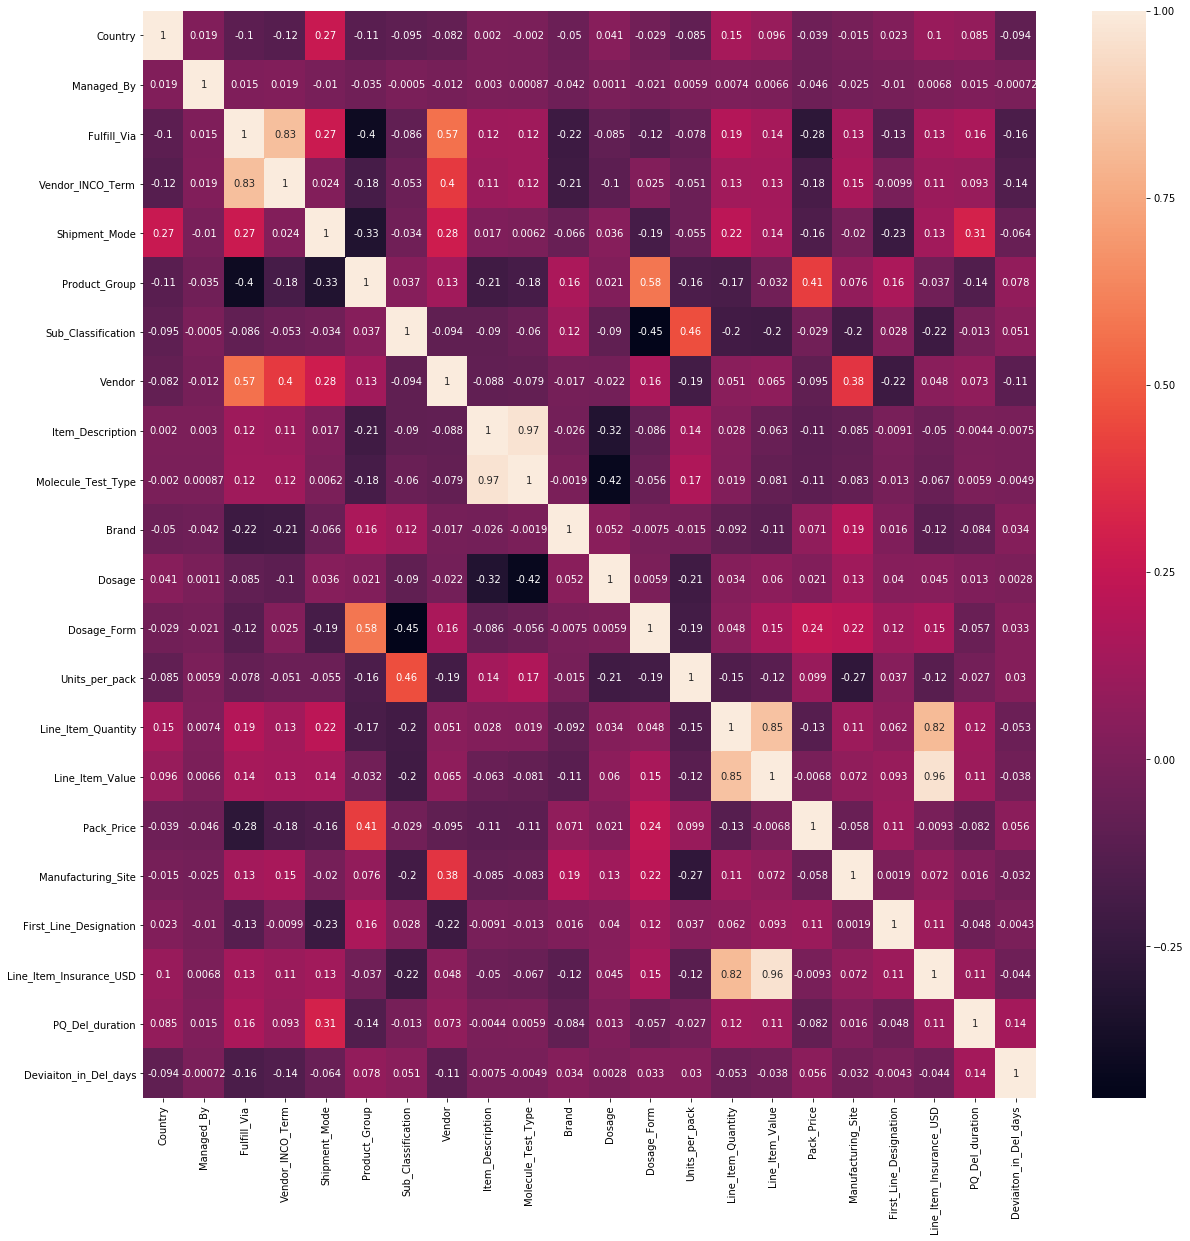

In [76]:
# LEts see correlation;
fig= plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True)

**This is a regression problem and as we see some of the columns are highly correlated.**
Line Item Quantity, and line item value are highly correlated with line item insuarance.
Molecule test type an item description are also correlated and that makes sense because one value depends on other.
line item Quantity and line item value is also highly correlated.
We will remove some of the feature down the line after analysis

In [77]:
# Target Variable : Freight cost

Y = df['Freight_Cost_USD']

In [86]:
# Input features
X = df.drop('Freight_Cost_USD',axis =1)

In [90]:
#X has strings Weight Captured Separately,See ASN-12145 (ID#:13696),See ASN-6355 (ID#:16828)
drop_col(X,['Weight_Kg'])

# Modeling

In [91]:
# Calling Important Libraries
# Libraries for Standardization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Sc = StandardScaler()
Mnmx_Sc= MinMaxScaler()

# linear regression Libraries
# To calculate multicollinearity and VIF 
import statsmodels.api as sm
from scipy import stats
from scipy.stats import mode

# for model building
# train test split
from  sklearn.model_selection import train_test_split

# Linear model Libraries and Evaluation 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# for polynomial featrues and other regressors
from sklearn.preprocessing import PolynomialFeatures

# Tree Regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [96]:
# Standard Scaling
X = Sc.fit_transform(X)
X = pd.DataFrame(X,columns=['Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode', 'Product_Group', 'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule_Test_Type', 'Brand', 'Dosage', 'Dosage_Form', 'Units_per_pack', 'Line_Item_Quantity', 'Line_Item_Value', 'Pack_Price', 'Manufacturing_Site', 'First_Line_Designation', 'Line_Item_Insurance_USD', 'PQ_Del_duration', 'Deviaiton_in_Del_days'])

In [103]:
X.

Country  Managed_By  Fulfill_Via  Vendor_INCO_Term  Shipment_Mode  Product_Group  Sub_Classification    Vendor  Item_Description  Molecule_Test_Type     Brand    Dosage  Dosage_Form  Units_per_pack  Line_Item_Quantity  Line_Item_Value  Pack_Price  Manufacturing_Site  First_Line_Designation  Line_Item_Insurance_USD  PQ_Del_duration  Deviaiton_in_Del_days
0    -0.800814    0.015406    -0.987164         -0.412698      -0.820888       2.277455            0.032746  0.086786         -0.596586           -0.661357 -0.807607 -1.038901     1.379635        0.338363           -0.480382        -0.467329    1.349586            0.398842                0.673243                -0.491098        -0.607961               0.152526
1     1.092084    0.015406    -0.987164         -0.412698      -0.820888      -0.408193           -0.610811 -0.121996          0.473826            0.647576 -0.196865 -1.038901     0.309774       -0.203541           -0.232590        -0.269667   -0.302117            1.069530                0.673243                -0.314289         1.199725               0.046700
2     1.186729    0.015406    -0.987164         -0.412698      -0.820888       2.277455            0.032746  0.086786         -0.596586           -0.661357 -0.807607  0.091837     1.379635        0.338363           -0.340098         0.860233    1.349586           -0.990440                0.673243                 0.496320         0.849850               0.117250
3    -0.895459    0.015406    -0.987164         -0.412698      -0.820888      -0.408193            1.963416 -1.513872          0.244452            0.478681 -0.196865  0.091837    -2.097411       -0.203541           -0.473746        -0.465729   -0.402459           -0.415564                0.673243                -0.489587        -1.291049               0.046700
4     0.524215    0.015406    -0.987164         -0.412698      -0.820888       2.277455            0.032746  0.086786         -0.596586           -0.661357 -0.807607 -1.392256     1.379635        0.338363           -0.478393        -0.446371    1.552526           -0.990440                0.673243                -0.472470         0.075128               0.046700
5    -0.232944    0.015406    -0.987164          0.215710      -0.820888      -0.408193           -0.610811 -2.557780          1.289378            1.196483  1.635361 -1.392256     0.042309       -0.203541           -0.471468        -0.460299   -0.299862           -1.086252                0.673243                -0.485265         0.025146               0.046700
6    -1.841908    0.015406    -0.987164         -0.412698      -0.820888       2.277455            0.032746  0.086786         -0.596586           -0.661357 -0.807607  1.575930     1.379635        0.338363           -0.447607        -0.157163    1.349586           -0.990440                0.673243                -0.213596        -0.466345               0.046700
7    -1.841908    0.015406    -0.987164         -0.412698      -0.820888       2.277455            0.032746 -1.583466         -0.188810           -0.070226  2.551474  1.575930     1.379635       -0.609969           -0.473590        -0.446986    0.120674           -0.511377                0.673243                -0.470577        -0.507996               0.046700
8    -0.895459    0.015406    -0.987164         -0.412698      -0.820888       4.963104            1.319860  0.295567          0.779658            0.816471 -0.196865  1.575930     1.379635       -0.609969           -0.480337        -0.467410   -0.082266            1.452780                0.673243                -0.491289        -0.208104               0.046700
9     1.092084    0.015406    -0.987164         -0.412698      -0.820888      -0.408193           -0.610811 -1.165903         -0.902418           -1.210265 -0.196865  1.575930     0.042309       -0.609969           -0.361993        -0.418516   -0.375401            0.207217                0.673243                -0.454952        -0.841210               0.328901
10    0.429570

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state =101)

In [104]:
# lasso linear regressor
lin_reg_lasso = linear_model.LassoLars(alpha=0.03,max_iter=101)
# Linear Regressor
lin_reg = LinearRegression()

In [105]:
X.type()

AttributeError: 'DataFrame' object has no attribute 'type'

In [99]:
# Linear model with linear features
lin_reg.fit(x_train, y_train)

ValueError: could not convert string to float: 'Freight Included in Commodity Cost'

In [ ]:
linpred = lin_reg.predict(x_test)

print(r2_score(y_test, linpred))